In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel('C:\\Users\\compu\\Downloads\\Software for Analysis\\Excel Data set\\Sales Listestiment (1).xlsx')
df.head()

,SrNo,Voucher Date,Day Book,Item Name,Item Group Name,GrossWt,NetWt,Bill Amt
0,2.0,2022-01-01,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.14,0.14,1000.0
1,8.0,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1500.0
2,9.0,2022-01-03,ESTIMATE,SILVER ZUDA,SILVER ORNAMENTS,216.80,216.80,17000.0
3,10.0,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1870.0
4,12.0,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.04,0.04,500.0


In [3]:
df.isnull().sum()

SrNo               1
Voucher Date       1
Day Book           1
Item Name          1
Item Group Name    1
GrossWt            0
NetWt              0
Bill Amt           0
dtype: int64

In [4]:
df.describe()

,SrNo,GrossWt,NetWt,Bill Amt
count,599.000000,600.000000,600.000000,6.000000e+02
mean,2490.936561,136.680967,136.555400,8.263785e+04
std,1294.054274,1714.422156,1712.926813,1.018372e+06
min,2.000000,0.000000,0.000000,0.000000e+00
25%,1258.000000,0.220000,0.217500,7.000000e+02
50%,2680.000000,5.000000,5.000000,1.350000e+03
75%,3634.500000,12.945000,12.945000,5.395000e+03
max,4542.000000,41004.290000,40966.620000,2.479136e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SrNo             599 non-null    float64       
 1   Voucher Date     599 non-null    datetime64[ns]
 2   Day Book         599 non-null    object        
 3   Item Name        599 non-null    object        
 4   Item Group Name  599 non-null    object        
 5   GrossWt          600 non-null    float64       
 6   NetWt            600 non-null    float64       
 7   Bill Amt         600 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 37.6+ KB


In [6]:
df['Item Name'].value_counts()

KANTI KDM                                      169
GOLD COIN 24K 999 FINE                          82
SILVER FINE COIN 10                             51
999 FINE                                        37
CELEBRATIONS FOREVER                            30
SILVER FINE COIN 5                              27
KADI KDM                                        19
SILVER CHORSA FINE                              18
92 MRP SILVER ORNAMENTS                         16
SILVER FINE COIN 20                             14
OTHER SILVER ORNAMENTS                          13
SILVER FINE COIN 15                             13
SILVER FINE COIN 50                              8
SILVER VINTI                                     7
SILVER PAYAL                                     7
SILVER FINE COIN 100                             6
SILVER FINE COIN 25                              5
SILVER DIVI                                      5
PACKING BOX                                      4
GENTS RING CASTING 22K 916 GOLD

In [7]:
df['Item Name'].unique()

array(['KANTI KDM', 'SILVER ZUDA', 'GOLD COIN 24K 999 FINE', '999 FINE',
       'KADI KDM', 'SILVER FINE COIN 10', 'SILVER CHORSA FINE',
       'SILVER OTHER', 'OTHER SILVER ORNAMENTS', 'SILVER FINE COIN 20',
       'CELEBRATIONS FOREVER', 'PETCH', 'BANGLES 916',
       'LADIES RING CASTING 22K 916 GOLD ORNAMENT',
       'GENTS RING CASTING 22K 916 GOLD ORNAMENT', 'CHAIN 916',
       'CHAIN HANDMADE 22K 916 GOLD ORNAMENT',
       'EARRINGS DROPS 22K 916 GOLD ORNAMENT', '92 MRP SILVER ORNAMENTS',
       'SILVER FINE COIN 5', 'SILVER VINTI', 'SILVER PAYAL',
       'LADIES BRECELET FANCY 22K 916 GOLD ORNAMENT',
       '916 GOLD ORNAMENTS', 'CHAIN HOLLOW 22K 916 GOLD ORNAMENT',
       'SILVER KADALI', 'CHAIN PENDANT 22K 916 GOLD ORNAMENT',
       'MANGALSUTRA ANTIQUE 22K 916 GOLD ORNAMENT',
       'CHAIN FENCY 22K 916 GOLD ORNAMENT', 'PACKING BOX',
       'SILVER SHOPISH', 'GENTS RING 916', 'SILVER PANDAL',
       'NANI BUTTI 916', 'SILVER CHATRA', 'KADI 916',
       'DESI ANTIQUE GOLD ORN

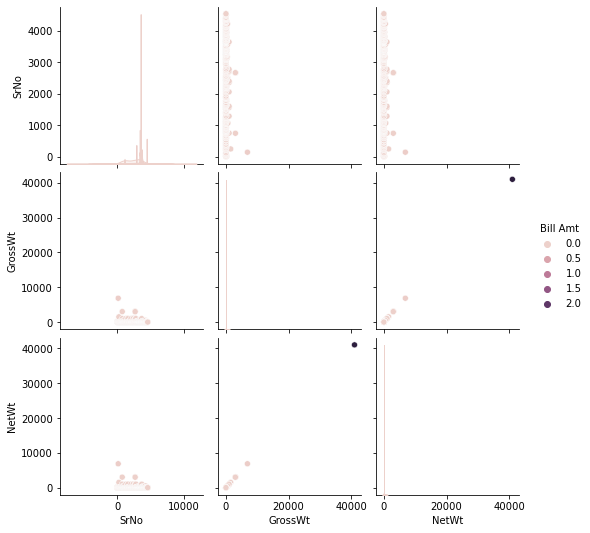

In [8]:
sns.pairplot(df, hue='Bill Amt')
plt.show()

In [9]:
del df[df.columns[0]]

In [10]:
df.head()

,Voucher Date,Day Book,Item Name,Item Group Name,GrossWt,NetWt,Bill Amt
0,2022-01-01,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.14,0.14,1000.0
1,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1500.0
2,2022-01-03,ESTIMATE,SILVER ZUDA,SILVER ORNAMENTS,216.80,216.80,17000.0
3,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1870.0
4,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.04,0.04,500.0


<AxesSubplot:xlabel='Bill Amt'>

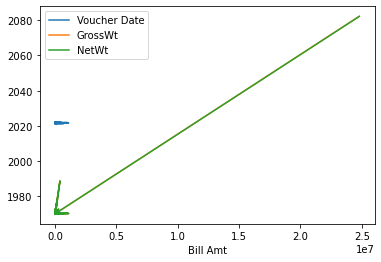

In [11]:
df.plot('Bill Amt')

<AxesSubplot:xlabel='Voucher Date'>

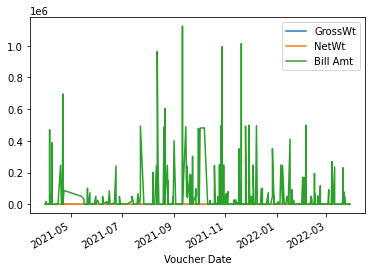

In [12]:
df.plot('Voucher Date')

In [13]:
df=df.dropna()

<AxesSubplot:>

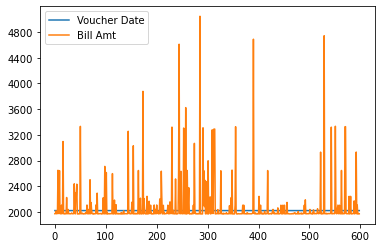

In [14]:
df.plot(y=['Voucher Date','Bill Amt'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 598
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Voucher Date     599 non-null    datetime64[ns]
 1   Day Book         599 non-null    object        
 2   Item Name        599 non-null    object        
 3   Item Group Name  599 non-null    object        
 4   GrossWt          599 non-null    float64       
 5   NetWt            599 non-null    float64       
 6   Bill Amt         599 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 37.4+ KB


array([[<AxesSubplot:xlabel='GrossWt', ylabel='GrossWt'>,
        <AxesSubplot:xlabel='NetWt', ylabel='GrossWt'>,
        <AxesSubplot:xlabel='Bill Amt', ylabel='GrossWt'>],
       [<AxesSubplot:xlabel='GrossWt', ylabel='NetWt'>,
        <AxesSubplot:xlabel='NetWt', ylabel='NetWt'>,
        <AxesSubplot:xlabel='Bill Amt', ylabel='NetWt'>],
       [<AxesSubplot:xlabel='GrossWt', ylabel='Bill Amt'>,
        <AxesSubplot:xlabel='NetWt', ylabel='Bill Amt'>,
        <AxesSubplot:xlabel='Bill Amt', ylabel='Bill Amt'>]], dtype=object)

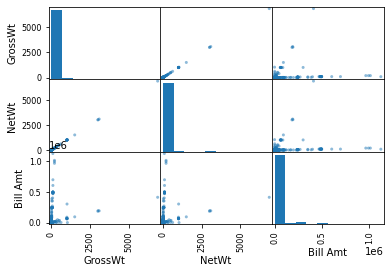

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

array([[<AxesSubplot:title={'center':'Voucher Date'}>]], dtype=object)

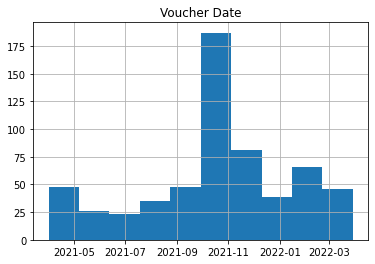

In [17]:
df.hist('Voucher Date')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, 'SILVER FINE COIN 25'),
  Text(0.0, 0, 'KANTI KDM'),
  Text(100.0, 0, 'KANTI KDM'),
  Text(200.0, 0, 'GOLD COIN 24K 999 FINE'),
  Text(300.0, 0, 'OTHER SILVER ORNAMENTS'),
  Text(400.0, 0, 'SILVER FINE COIN 5'),
  Text(500.0, 0, 'SILVER FINE COIN 25'),
  Text(600.0, 0, ''),
  Text(700.0, 0, '')])

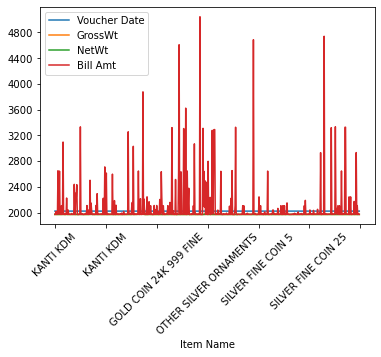

In [18]:
df.plot('Item Name')
plt.xticks(rotation=45)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, 'SILVER FINE'),
  Text(0.0, 0, 'KDM GOLD ORNAMENTS'),
  Text(100.0, 0, 'KDM GOLD ORNAMENTS'),
  Text(200.0, 0, '999 FINE'),
  Text(300.0, 0, 'SILVER ORNAMENTS'),
  Text(400.0, 0, 'SILVER FINE'),
  Text(500.0, 0, 'SILVER FINE'),
  Text(600.0, 0, ''),
  Text(700.0, 0, '')])

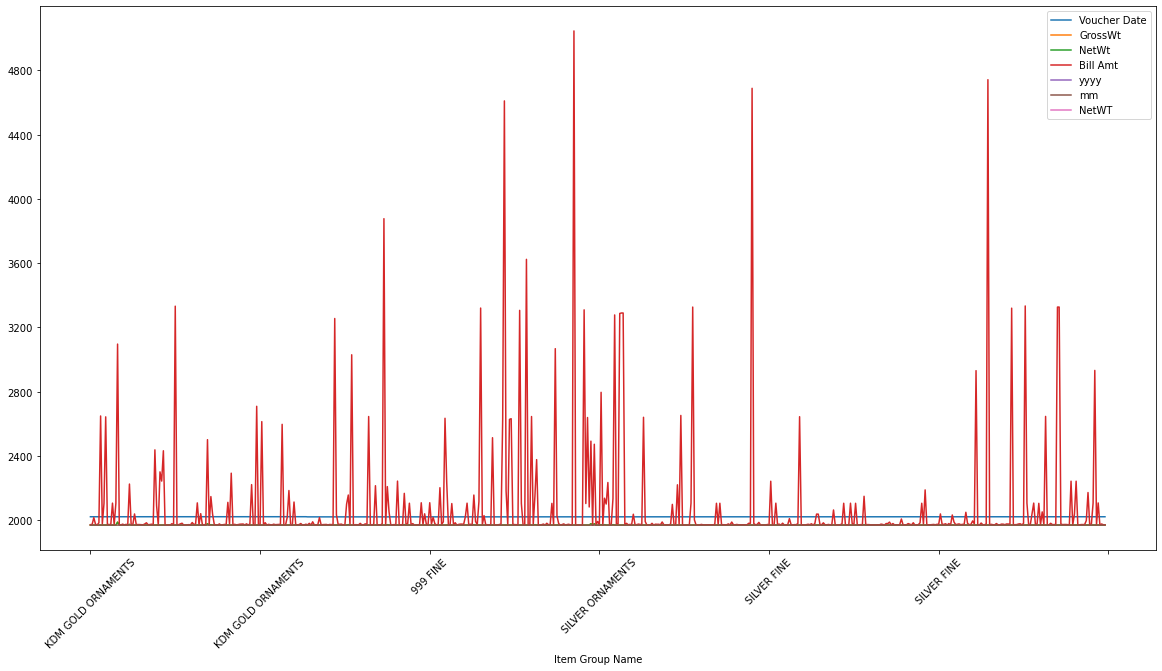

In [67]:
df.plot('Item Group Name')
plt.xticks(rotation=45)

In [20]:
df.head()

,Voucher Date,Day Book,Item Name,Item Group Name,GrossWt,NetWt,Bill Amt
0,2022-01-01,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.14,0.14,1000.0
1,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1500.0
2,2022-01-03,ESTIMATE,SILVER ZUDA,SILVER ORNAMENTS,216.80,216.80,17000.0
3,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1870.0
4,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.04,0.04,500.0


In [21]:
df['Voucher Date'].dt.to_period('M')

0      2022-01
1      2022-01
2      2022-01
3      2022-01
4      2022-01
        ...   
594    2021-12
595    2021-12
596    2021-12
597    2021-12
598    2021-12
Name: Voucher Date, Length: 599, dtype: period[M]

In [22]:
df['Voucher Date'].dt.strftime('%m/%Y')


0      01/2022
1      01/2022
2      01/2022
3      01/2022
4      01/2022
        ...   
594    12/2021
595    12/2021
596    12/2021
597    12/2021
598    12/2021
Name: Voucher Date, Length: 599, dtype: object

In [23]:
df['yyyy']=pd.to_datetime(df['Voucher Date']).dt.year
df['mm']=pd.to_datetime(df['Voucher Date']).dt.month

In [34]:
df

,Voucher Date,Day Book,Item Name,Item Group Name,GrossWt,NetWt,Bill Amt,yyyy,mm
0,2022-01-01,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.14,0.14,1000.0,2022,1
1,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1500.0,2022,1
2,2022-01-03,ESTIMATE,SILVER ZUDA,SILVER ORNAMENTS,216.80,216.80,17000.0,2022,1
3,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1870.0,2022,1
4,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.04,0.04,500.0,2022,1
...,...,...,...,...,...,...,...,...,...
594,2021-12-29,ESTIMATE,GOLD COIN 24K 999 FINE,999 FINE,5.00,5.00,50400.0,2021,12
595,2021-12-29,ESTIMATE,GOLD COIN 24K 999 FINE,999 FINE,5.00,5.00,0.0,2021,12
596,2021-12-31,ESTIMATE,KADI KDM,KDM GOLD ORNAMENTS,0.39,0.39,2600.0,2021,12
597,2021-12-31,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.10,0.10,800.0,2021,12


In [69]:
df['Item Name'].unique()

array(['KANTI KDM', 'SILVER ZUDA', 'GOLD COIN 24K 999 FINE', '999 FINE',
       'KADI KDM', 'SILVER FINE COIN 10', 'SILVER CHORSA FINE',
       'SILVER OTHER', 'OTHER SILVER ORNAMENTS', 'SILVER FINE COIN 20',
       'CELEBRATIONS FOREVER', 'PETCH', 'BANGLES 916',
       'LADIES RING CASTING 22K 916 GOLD ORNAMENT',
       'GENTS RING CASTING 22K 916 GOLD ORNAMENT', 'CHAIN 916',
       'CHAIN HANDMADE 22K 916 GOLD ORNAMENT',
       'EARRINGS DROPS 22K 916 GOLD ORNAMENT', '92 MRP SILVER ORNAMENTS',
       'SILVER FINE COIN 5', 'SILVER VINTI', 'SILVER PAYAL',
       'LADIES BRECELET FANCY 22K 916 GOLD ORNAMENT',
       '916 GOLD ORNAMENTS', 'CHAIN HOLLOW 22K 916 GOLD ORNAMENT',
       'SILVER KADALI', 'CHAIN PENDANT 22K 916 GOLD ORNAMENT',
       'MANGALSUTRA ANTIQUE 22K 916 GOLD ORNAMENT',
       'CHAIN FENCY 22K 916 GOLD ORNAMENT', 'PACKING BOX',
       'SILVER SHOPISH', 'GENTS RING 916', 'SILVER PANDAL',
       'NANI BUTTI 916', 'SILVER CHATRA', 'KADI 916',
       'DESI ANTIQUE GOLD ORN

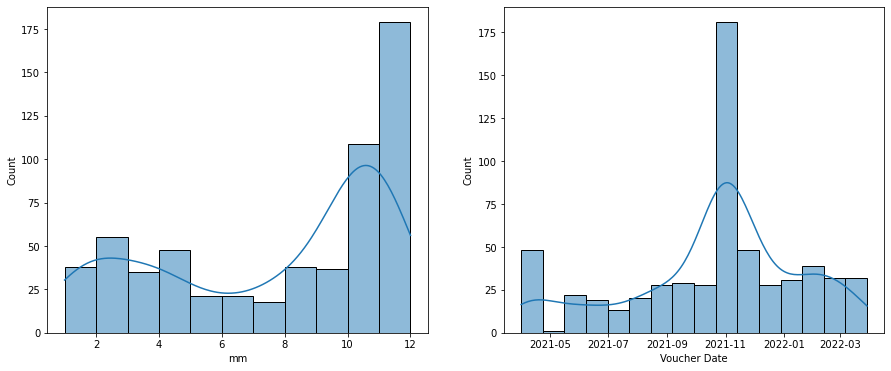

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(df['mm'], ax=ax1, kde=True)
sns.histplot(df['Voucher Date'], ax=ax2, kde=True);

In [56]:
from sklearn import preprocessing


In [58]:

df.value_counts

<bound method DataFrame.value_counts of     Voucher Date  Day Book               Item Name     Item Group Name  \
0     2022-01-01  ESTIMATE               KANTI KDM  KDM GOLD ORNAMENTS   
1     2022-01-03  ESTIMATE               KANTI KDM  KDM GOLD ORNAMENTS   
2     2022-01-03  ESTIMATE             SILVER ZUDA    SILVER ORNAMENTS   
3     2022-01-03  ESTIMATE               KANTI KDM  KDM GOLD ORNAMENTS   
4     2022-01-03  ESTIMATE               KANTI KDM  KDM GOLD ORNAMENTS   
..           ...       ...                     ...                 ...   
594   2021-12-29  ESTIMATE  GOLD COIN 24K 999 FINE            999 FINE   
595   2021-12-29  ESTIMATE  GOLD COIN 24K 999 FINE            999 FINE   
596   2021-12-31  ESTIMATE                KADI KDM  KDM GOLD ORNAMENTS   
597   2021-12-31  ESTIMATE               KANTI KDM  KDM GOLD ORNAMENTS   
598   2021-12-31  ESTIMATE      SILVER CHORSA FINE         SILVER FINE   

     GrossWt   NetWt  Bill Amt  yyyy  mm  NetWT  
0       0.14    0.14 

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [62]:
!pip install keras

In [64]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=1fb0a2d96d6ef58593e5c26e93cc8a95890814e682a1e85883cc84ef8dc59ee7
  Stored in directory: c:\users\compu\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [78]:
Item_group_name.head()

,Voucher Date,Day Book,Item Name,Item Group Name,GrossWt,NetWt,Bill Amt,yyyy,mm,NetWT
0,2022-01-01,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.14,0.14,1000.0,NaN,1,NaN
1,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1500.0,NaN,1,NaN
2,2022-01-03,ESTIMATE,SILVER ZUDA,SILVER ORNAMENTS,216.80,216.80,17000.0,NaN,1,NaN
3,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.24,0.24,1870.0,NaN,1,NaN
4,2022-01-03,ESTIMATE,KANTI KDM,KDM GOLD ORNAMENTS,0.04,0.04,500.0,NaN,1,NaN
5,2022-01-05,ESTIMATE,GOLD COIN 24K 999 FINE,999 FINE,1.00,1.00,5220.0,NaN,1,NaN
6,2022-01-06,ESTIMATE,999 FINE,999 FINE,50.00,50.00,248000.0,NaN,1,NaN
7,2022-01-08,ESTIMATE,KADI KDM,KDM GOLD ORNAMENTS,0.35,0.35,2150.0,NaN,1,NaN
8,2022-01-08,ESTIMATE,GOLD COIN 24K 999 FINE,999 FINE,10.00,10.00,49450.0,NaN,1,NaN
9,2022-01-08,ESTIMATE,999 FINE,999 FINE,50.00,50.00,246000.0,NaN,1,NaN


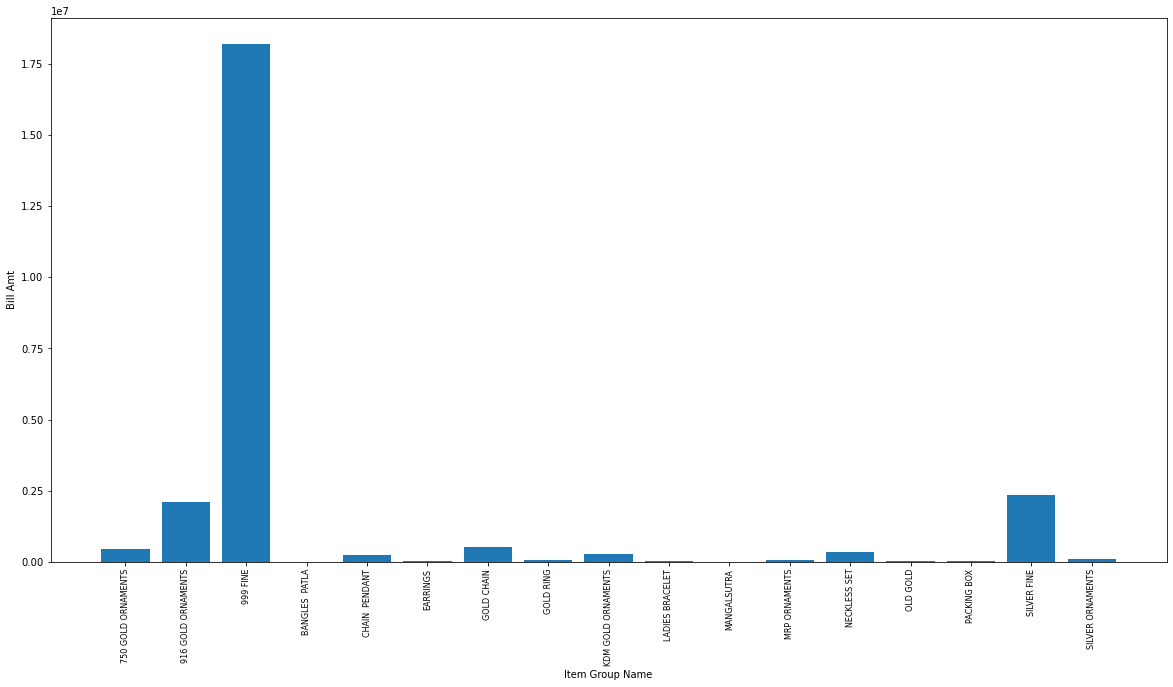

In [80]:
Item_group_name= df.groupby('Item Group Name')



Bill_Values=Item_group_name.sum()['Bill Amt']
Items= [Item for Item, df in Item_group_name]

plt.bar(Items,Bill_Values)
plt.ylabel('Bill Amt')
plt.xlabel('Item Group Name')
plt.xticks(Items, rotation='vertical', size=8)
plt.show()

([<matplotlib.axis.XTick at 0x2854fbc03a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

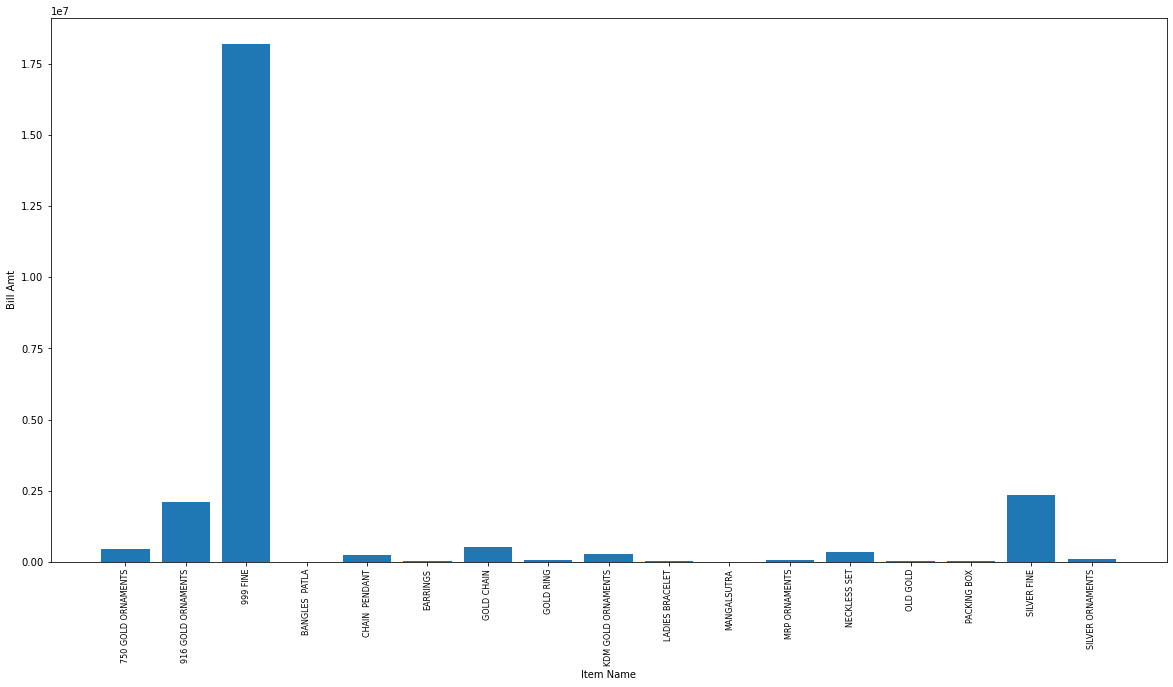

In [79]:
Bill_Values=Item_group_name.sum()['Bill Amt']
Items= [Item for Item, df in Item_group_name]

plt.bar(Items,Bill_Values)
plt.ylabel('Bill Amt')
plt.xlabel('Item Name')
plt.xticks(Items, rotation='vertical', size=8)